In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report, log_loss

In [ ]:
"""
- Variables
age : Âge de l'individu (en années).
sex : Sexe de l'individu (1 = homme, 0 = femme).
cp (type de douleur thoracique) :
    0 : Angine typique.
    1 : Angine atypique.
    2 : Douleur non angineuse.
    3 : Asymptomatique.
trestbps : Pression artérielle au repos (en mm Hg).
chol : Taux de cholestérol sérique (en mg/dL).
fbs : Glycémie à jeun (1 = vrai si > 120 mg/dL, 0 = faux).
restecg (résultats électrocardiographiques au repos) :
    0 : Normal.
    1 : Anomalie de l’onde ST-T.
    2 : Hypertrophie ventriculaire gauche probable ou certaine.
thalach : Fréquence cardiaque maximale atteinte.
exang : Angine induite par l'exercice (1 = oui, 0 = non).
oldpeak : Dépression ST induite par l'exercice par rapport au repos.
slope : Pente du segment ST au pic de l'exercice :
    0 : Ascendante.
    1 : Plate.
    2 : Descendante.
ca : Nombre de vaisseaux majeurs (0–3) colorés par fluoroscopie.
thal : Type de thalassémie :
    1 : Normal.
    2 : Défaut fixe.
    3 : Défaut réversible.

- Cible
target : Présence de maladie cardiaque (1 = oui, 0 = non)."""

In [38]:
data = pd.read_csv('heart.csv')
print(len(data))
data.head(10)

303


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [39]:
data.isna().sum().sum()

0

In [40]:
data.describe().round(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000,303.0000
mean,54.3663,0.6832,0.9670,131.6238,246.2640,0.1485,0.5281,149.6469,0.3267,1.0396,1.3993,0.7294,2.3135,0.5446
std,9.0821,0.4660,1.0321,17.5381,51.8308,0.3562,0.5259,22.9052,0.4698,1.1611,0.6162,1.0226,0.6123,0.4988
min,29.0000,0.0000,0.0000,94.0000,126.0000,0.0000,0.0000,71.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,47.5000,0.0000,0.0000,120.0000,211.0000,0.0000,0.0000,133.5000,0.0000,0.0000,1.0000,0.0000,2.0000,0.0000
50%,55.0000,1.0000,1.0000,130.0000,240.0000,0.0000,1.0000,153.0000,0.0000,0.8000,1.0000,0.0000,2.0000,1.0000
75%,61.0000,1.0000,2.0000,140.0000,274.5000,0.0000,1.0000,166.0000,1.0000,1.6000,2.0000,1.0000,3.0000,1.0000
max,77.0000,1.0000,3.0000,200.0000,564.0000,1.0000,2.0000,202.0000,1.0000,6.2000,2.0000,4.0000,3.0000,1.0000


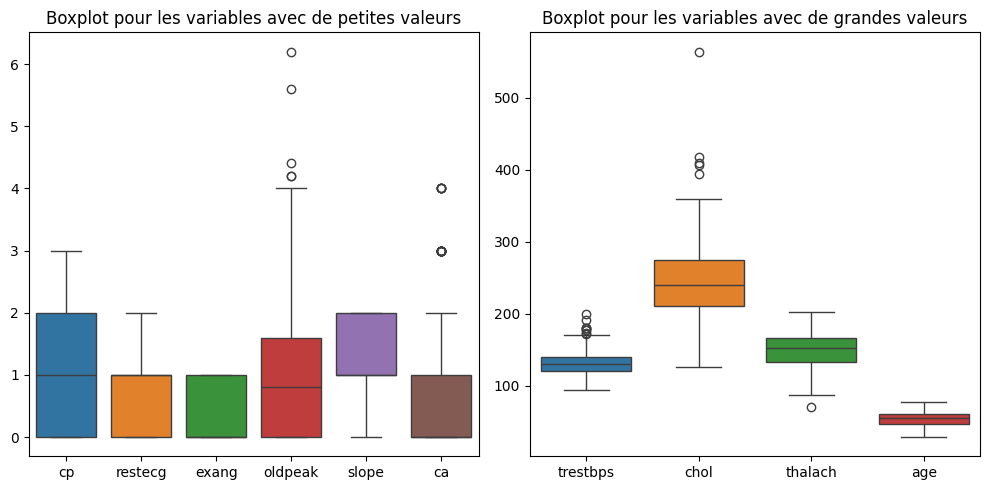

In [25]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

sns.boxplot(data=data.drop(['trestbps', 'chol', 'thalach', 'age', 'target', 'sex', 'fbs', 'thal'], 
                           axis=1),
            ax=axs[0])
axs[0].set_title('Boxplot pour les variables avec de petites valeurs')

sns.boxplot(data=data[['trestbps', 'chol', 'thalach', 'age']],
            ax=axs[1])
axs[1].set_title('Boxplot pour les variables avec de grandes valeurs')

plt.tight_layout()


In [26]:
df = data.copy()
# drop outliers
features = ['oldpeak','ca','trestbps', 'chol', 'thalach']

# Loop through each feature to calculate bounds
for feature in features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the dataset to exclude outliers
    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]


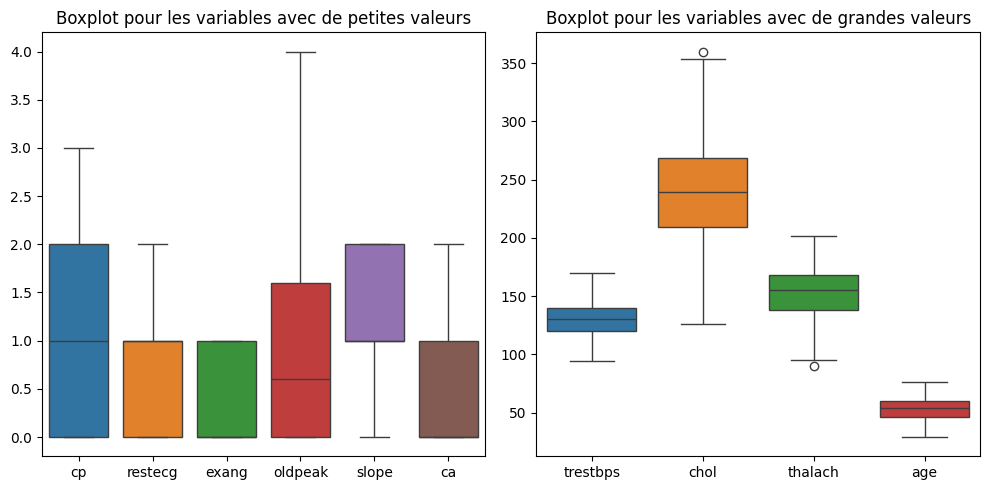

In [27]:
# create two figures side by side
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

sns.boxplot(data=df.drop(['trestbps','chol','thalach','age','target','sex','fbs','thal'], axis=1), ax=axs[0])
axs[0].set_title('Boxplot pour les variables avec de petites valeurs')

sns.boxplot(data=df[['trestbps','chol','thalach','age']], ax=axs[1])
axs[1].set_title('Boxplot pour les variables avec de grandes valeurs')

plt.tight_layout()

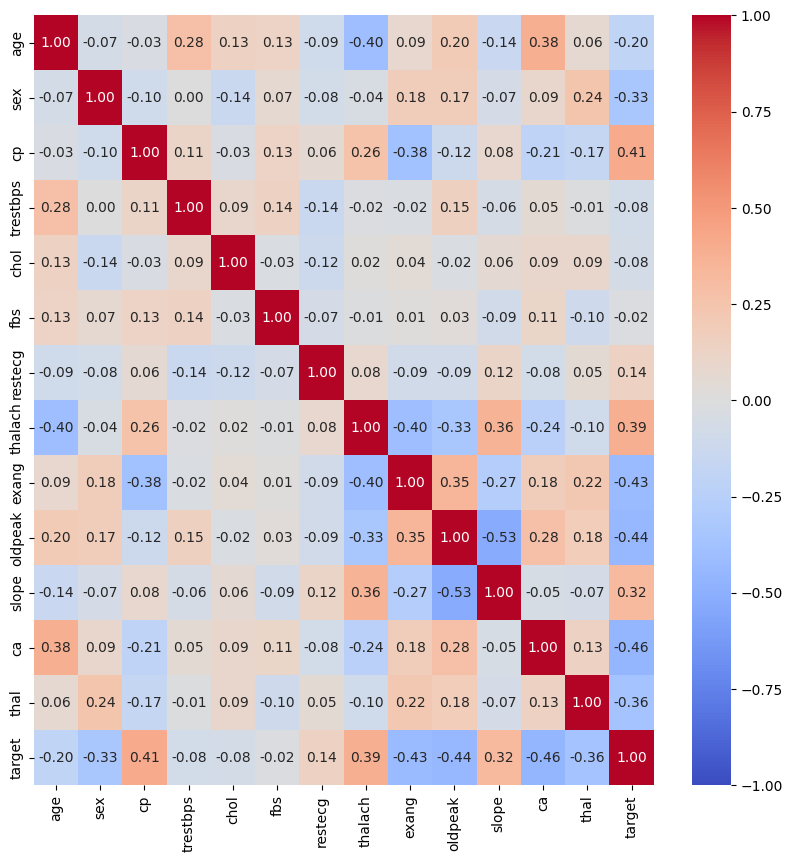

In [28]:
# Correlation and Heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm',vmin=-1,vmax=1)
plt.show()

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=40)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'L\'exactiture : {accuracy*100:.2f}%')
print('Le rapport de classification\n',classification_report(y_test,y_pred))

L'exactiture : 89.87%
Le rapport de classification
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        39
           1       0.90      0.90      0.90        40

    accuracy                           0.90        79
   macro avg       0.90      0.90      0.90        79
weighted avg       0.90      0.90      0.90        79



In [30]:
accuracy_0 = accuracy_score(y_test[y_test==0],y_pred[y_test==0])
accuracy_1 = accuracy_score(y_test[y_test==1],y_pred[y_test==1])

print(f'Exactitude pour la catégorie 0 : {accuracy_0*100:0.2f}')
print(f'Exactitude pour la catégorie 1 : {accuracy_1*100:0.2f}')

Exactitude pour la catégorie 0 : 89.74
Exactitude pour la catégorie 1 : 90.00


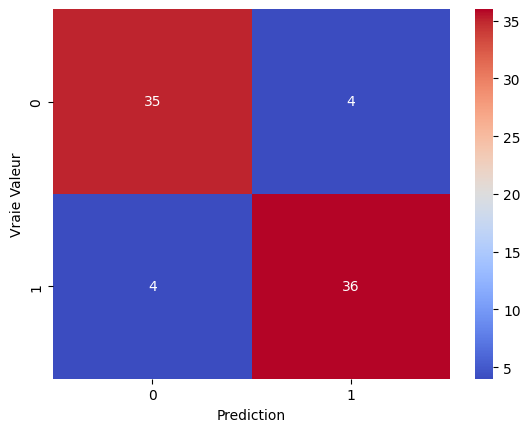

In [31]:
# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap='coolwarm')
plt.xlabel('Prediction')
plt.ylabel('Vraie Valeur')
plt.show()

In [32]:
cvs = cross_val_score(model,X,y,cv=5,n_jobs=2)
print('Cross-validated scores:')
cpt = 1
for i in cvs:
    print(f'Fold {cpt}: {i*100:.2f} %')
    cpt+=1

Cross-validated scores:
Fold 1: 86.79 %
Fold 2: 86.79 %
Fold 3: 90.38 %
Fold 4: 84.62 %
Fold 5: 80.77 %


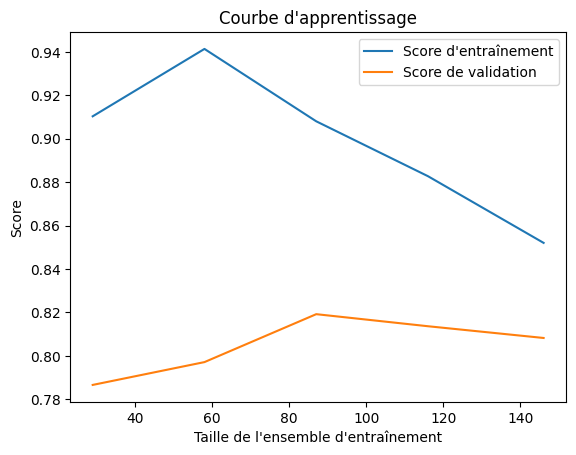

In [33]:
# Tracer la courbe d'apprentissage
n, tr_score, val_score = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.2, 1, 5), cv=5)
plt.plot(n, tr_score.mean(axis=1), label="Score d'entraînement")
plt.plot(n, val_score.mean(axis=1), label="Score de validation")
plt.title("Courbe d'apprentissage")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Score")
plt.legend()
plt.show()

In [34]:
y_pred_prob = model.predict_proba(X_test)[:, 1]
log_loss_value = log_loss(y_test, y_pred_prob)
print(f"Log Loss: {log_loss_value}")

Log Loss: 0.3403794807950566


In [35]:
model.coef_

array([[ 0.04628636, -1.06991423,  0.66413314, -0.53702068, -0.04805366,
         0.14660542,  0.03568694,  0.71041643, -0.34681493, -0.46891762,
         0.49371147, -0.9443543 , -0.61839332]])

In [36]:
# Using coeffs of the model we show the equation of the model
coeffs = model.coef_
intercept = model.intercept_

print(f"Equation du modèle: \n\nlogit(p) = {intercept[0]:.4f} + {coeffs[0][0]:.4f}*x1 + {coeffs[0][1]:.4f}*x2 + {coeffs[0][2]:.4f}*x3 + {coeffs[0][3]:.4f}*x4 + {coeffs[0][4]:.4f}*x5 + {coeffs[0][5]:.4f}*x6 + {coeffs[0][6]:.4f}*x7 + {coeffs[0][7]:.4f}*x8 + {coeffs[0][8]:.4f}*x9 + {coeffs[0][9]:.4f}*x10")

Equation du modèle: 

logit(p) = 0.4329 + 0.0463*x1 + -1.0699*x2 + 0.6641*x3 + -0.5370*x4 + -0.0481*x5 + 0.1466*x6 + 0.0357*x7 + 0.7104*x8 + -0.3468*x9 + -0.4689*x10


In [42]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [45]:
for i in model.coef_:
    print(i.round(4))

[ 0.0463 -1.0699  0.6641 -0.537  -0.0481  0.1466  0.0357  0.7104 -0.3468
 -0.4689  0.4937 -0.9444 -0.6184]


In [46]:
model.intercept_

array([0.432906])